# Objective

Create Model that finds the best suited Movie for one
user using SVD



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
netflix_dataset = pd.read_csv("/content/drive/MyDrive/Copy of combined_data_1.txt/combined_data_1.txt", header=None, names=["Cust_ID", "Rating"] , usecols=[0,1])

In [ ]:
netflix_dataset

,Cust_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count["Rating"]
movie_count

4499

In [ ]:
total_count = netflix_dataset["Cust_ID"].nunique()
total_count

475257

In [ ]:
customer_count = total_count - movie_count
customer_count

470758

In [ ]:
rating_count = netflix_dataset["Cust_ID"].count() - movie_count
rating_count

24053764

In [ ]:
stars = netflix_dataset.groupby("Rating")["Rating"].agg(["count"])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


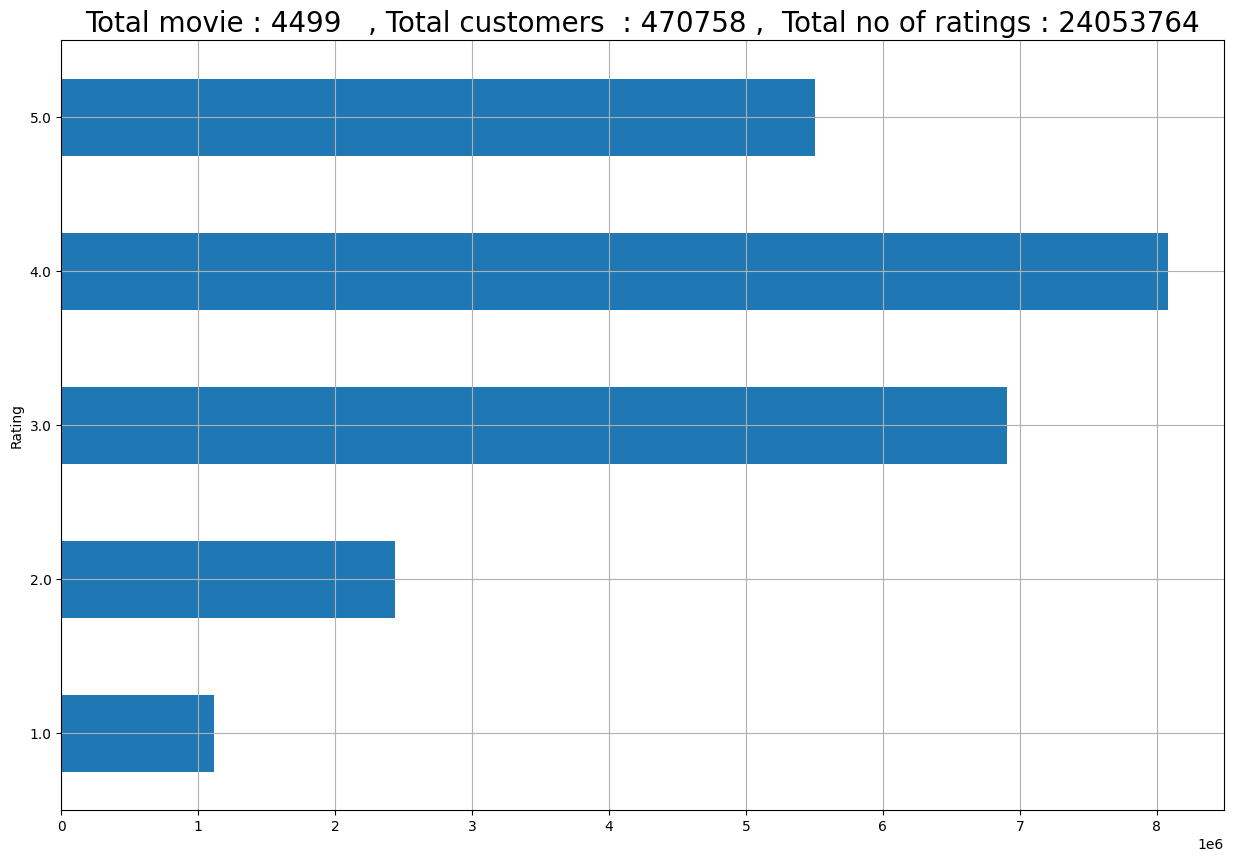

In [ ]:
ax= stars.plot(kind="barh",legend=False , figsize=(15,10))
plt.title(f'Total movie : {movie_count}   , Total customers  : {customer_count} ,  Total no of ratings : {rating_count}', fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
# Lets just make a clear dataframe to find how many movie id are there

movie_id=None
movie_np = [ ]  # Empty list to store all movie id

# Iterate over the dataframe rows
for i in netflix_dataset["Cust_ID"]:
  if ":" in i:
    # Update the current movie ID in column
    movie_id = int(i.replace(":" , ''))         # removing : from number
  movie_np.append(movie_id) # Adding movie id number in the list

In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# Create a new column in dataset to store movie id
netflix_dataset["Movie_Id"]=movie_np

In [ ]:
netflix_dataset

,Cust_ID,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset["Rating"].notna()]
# To keep only the rows where the rating column is not null ( example It exclude rows whete the Rating is NaN)

In [ ]:
netflix_dataset

,Cust_ID,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
# Change the datatype of cust id from object to int
netflix_dataset["Cust_ID"]=netflix_dataset["Cust_ID"].astype(int)

<ipython-input-18-7324feb14f76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_ID"]=netflix_dataset["Cust_ID"].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
# Pre -filtering
# Remove all the users that have rated less movies
# Remove all the movies that have been rated less

In [ ]:
# Count the rating of movie id
dataset_movie_summary = netflix_dataset.groupby("Movie_Id")["Rating"].agg(["count"])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
# Now we will create a benchmark ( consider a benchmark value like 60 percentile )
movie_benchmark = round(dataset_movie_summary["count"].quantile(0.6),0)  # Round off to how many decimal places 0 means 48 not 48.0
movie_benchmark

908.0

In [ ]:
# If any movie is having ratings less than 908 exclude that movie
drop_movie_list =dataset_movie_summary[dataset_movie_summary["count"] < movie_benchmark].index
drop_movie_list  # List that will store the index of all movie which are having ratings less than 908

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
#How many movie we are going to remove
len(drop_movie_list)

2699

In [ ]:
# Remove all the users that are in-active  ( who have rated less number of movies?)
dataset_cust_summary = netflix_dataset.groupby("Cust_ID")["Rating"].agg(["count"])
dataset_cust_summary

,count
Cust_ID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary["count"].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
# If any user have rated less than 36 movie, remove them
drop_cust_list =dataset_cust_summary[dataset_cust_summary["count"] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_ID', length=282042)

In [ ]:
len(drop_cust_list) # How many users we are going to remove

282042

In [ ]:
netflix_dataset= netflix_dataset[~netflix_dataset["Movie_Id"].isin(drop_movie_list)]  # Consider every movie after excluding the movie which are present in this list
netflix_dataset= netflix_dataset[~netflix_dataset["Cust_ID"].isin(drop_cust_list)] # Consider every customer id after excluding the customer id which are present in this list

In [ ]:
netflix_dataset  # Final shape after removing extra users and extra less rated movies

,Cust_ID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
# Final data that we are left behind is 1 crore 96 lakh 95 thousand 8 hundred thirty six

### Model Building

2.Create Model that finds the best suited Movie for one user in every genre.

In [ ]:
# Load the second dataset for movie names as with previous dataset we only have movie id

df_title =pd.read_csv("/content/drive/MyDrive/Copy of movie_titles.csv",encoding="ISO-8859-1",header=None , names=["Movie_Id" , "Year" , "Name"] , usecols=[0,1,2])
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357289 sha256=c3651bafc2c4e98d3cf4c79b6eb20b97e9bd27dfd1a652117e7f58b51c5d3c2e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Reader , Dataset , SVD
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
# We only work with top 100k records for quick runtime
data = Dataset.load_from_df(netflix_dataset[["Cust_ID" , "Movie_Id" , "Rating"]][ :100000] ,reader)

In [ ]:
data

In [ ]:
model = SVD() # Creating a SVD model

In [ ]:
cross_validate(model ,data , measures=["RMSE"],cv=3)  # Training the SVD model with top 100k data

{'test_rmse': array([1.02132028, 1.01249561, 1.02122536]),
 'fit_time': (4.732253074645996, 1.2665953636169434, 1.310288429260254),
 'test_time': (0.25374698638916016, 0.1592719554901123, 0.38171911239624023)}

In [ ]:
netflix_dataset

,Cust_ID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


###Recommendations

In [ ]:
# Filter the data for finding a specific user 1331154 to whom we are going to suggest the movies
user_rating =netflix_dataset[netflix_dataset["Cust_ID"]==1331154]
user_rating

,Cust_ID,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
# User 1331154 have rated 253 movies

In [ ]:
# Make a copy of each individual customer for recommnedation
user_1331154=df_title.copy()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Remove the less rates movies from 2nd dataset also
user_1331154 = user_1331154[~user_1331154["Movie_Id"].isin(drop_movie_list)]

In [ ]:
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Prediction part
user_1331154["Estimated_Score"]= user_1331154["Movie_Id"].apply(lambda x:model.predict(1331154 ,x).est)
user_1331154

<ipython-input-56-f344901ecfa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154["Estimated_Score"]= user_1331154["Movie_Id"].apply(lambda x:model.predict(1331154 ,x).est)


,Movie_Id,Year,Name,Estimated_Score
2,3,1997.0,Character,3.969061
4,5,2004.0,The Rise and Fall of ECW,4.695495
5,6,1997.0,Sick,3.484361
7,8,2004.0,What the #$*! Do We Know!?,3.004537
15,16,1996.0,Screamers,2.994946
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.625463
17766,17767,2004.0,Fidel Castro: American Experience,3.625463
17767,17768,2000.0,Epoch,3.625463
17768,17769,2003.0,The Company,3.625463


#### Display top 5 movies with highest estimates score that user 1331154 can like ?

In [ ]:
user_1331154.sort_values("Estimated_Score",ascending=False)

,Movie_Id,Year,Name,Estimated_Score
4,5,2004.0,The Rise and Fall of ECW,4.695495
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.580207
2,3,1997.0,Character,3.969061
29,30,2003.0,Something's Gotta Give,3.882273
17,18,1994.0,Immortal Beloved,3.835025
...,...,...,...,...
7,8,2004.0,What the #$*! Do We Know!?,3.004537
15,16,1996.0,Screamers,2.994946
25,26,2004.0,Never Die Alone,2.870113
23,24,1981.0,My Bloody Valentine,2.799917


In [ ]:
user_1331154.head(5)

,Movie_Id,Year,Name,Estimated_Score
2,3,1997.0,Character,3.969061
4,5,2004.0,The Rise and Fall of ECW,4.695495
5,6,1997.0,Sick,3.484361
7,8,2004.0,What the #$*! Do We Know!?,3.004537
15,16,1996.0,Screamers,2.994946
